In [7]:
#import for homework
import numpy as np
import os
import random
import math
from common import *

Image Filtering [50 pts]\
In this first section, you will explore different ways to filter images. Through these tasks you will build
up a toolkit of image filtering techniques. By the end of this problem, you should understand how the
development of image filtering techniques has led to convolution.

Image Patches [8 pts] A patch is a small piece of an image. Sometimes we will focus on the patches of
an image instead of operating on the entire image itself.

(5 pts) Take the image ’grace hopper.png’, load it as grayscale, and divide the image into 16
by 16 pixel image patches. Normalize each patch to have zero mean and unit variance. Complete the
function image patches in filters.py. Plot three of the 16x16 image patches in your report.

In [3]:
## Image Patches ##
def image_patches(image, patch_size=(16,16)):
    # Given an input image and patch_size,
    # return the corresponding image patches made
    # by dividing up the image into patch_size sections.
    # Input- image: H x W
    #        patch_size: a scalar tuple M, N 
    # Output- results: a list of images of size M x N
    
    h,w = image.shape
    output = []
    for j in range( 0, h, patch_size[0]):
        for i in range( 0, w, patch_size[1]):
            # split up a patch
            patch = image[ j : j + patch_size[0], i : i + patch_size[1]]
            # normalize each patch
            norm = (patch - patch.mean()) / patch.var()
            output.append(patch)
            
    return output

Note: there may be some patches not perfectly 16x16 due to the size of the image not being perfect to the patch sizes

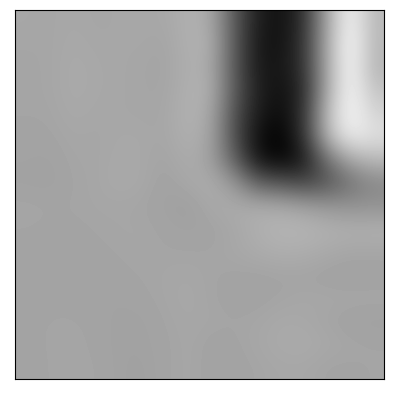

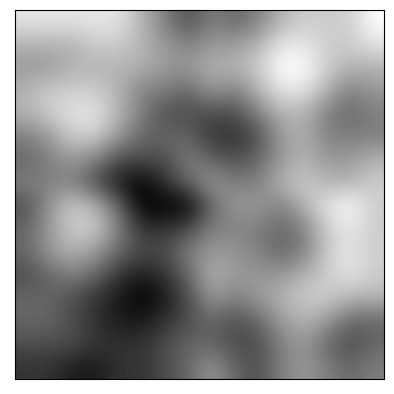

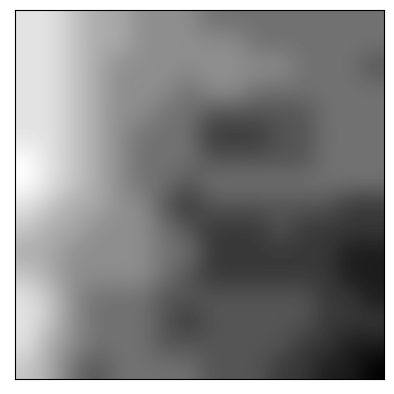

In [124]:
img = read_img('hw2_files/grace_hopper.png')
patches = image_patches(img)

display_img(patches[260])
display_img(patches[528])
display_img(patches[0])

(3 pts) Early work in computer vision used unique images patches as descriptors or features of images
for applications ranging from image alignment and stitching to object classification and detection.
Inspect the patches extracted in the previous question, and discuss, in a few sentences, why they
would be good or bad descriptors. Consider how those patches would look like if we changed the
object’s pose, scale, illumination, etc.

Gaussian Filter [16 pts] \
A Gaussian filter is a filter whose impulse response is a Gaussian function. Here
we only talk about the discrete kernel and assume 2D Gaussian distribution is circularly symmetric.

$$1D\ Kernel\ :\ G(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{x^{2}}{2\sigma^{2}}} \quad \quad 2D\ Kernel\ :\ G(x,y) = \frac{1}{2\pi\sigma^{2}}e^{-\frac{x^{2}+y^{2}}{2\sigma^{2}}}$$


(5 pts) For a 2D Gaussian filter with a given variance $\sigma^{2}$, the convolution can be reduced by sequential
operations of a 1D kernel. Prove that a convolution by a 2D Gaussian filter is equivalent to sequential
convolutions of a vertical and a horizontal 1D Gaussian filter. Specify the relationship between the
2D and 1D Gaussian filter, especially the relationship between their variances.

(4 pts) Take the image ’grace hopper.png’ as the input. Complete the function convolve()
and other related parts in filters.py. Use a Gaussian kernel with size 3 ×3 and $\sigma^{2} \approx \frac{1}{2ln(2)}$.
Plot the output images in your report. Describe what Gaussian filtering does to the image in one sentence.
Be sure to implement convolution and not cross-correlation.

Given $\sigma^{2} \approx \frac{1}{2ln(2)}$
$$
\begin{align}G(x,y) 
    &= \frac{1}{2\pi\frac{1}{2ln(2)}}e^{-\frac{x^{2}+y^{2}}{2\frac{1}{2ln(2)}}}\\
    &= \frac{ln(2)}{\pi}e^{-\frac{x^{2}+y^{2}}{2\frac{1}{2ln(2)}}}\\
    &= \frac{ln(2)}{\pi}e^{-({ln(2)}({x^{2}+y^{2}}))}\\
    &= \frac{ln(2)}{\pi}2^{-({x^{2}+y^{2}})}\\
\end{align}
$$

Given 3x3 kernel, where the center of origin is (0,0)
$$
kernel = 
\begin{bmatrix} 
    (-1,1) & (0,1) & (1,1) \\ 
    (-1,0) & (0,0) & (1,0) \\ 
    (-1,-1) & (0,-1) & (1,-1) 
\end{bmatrix}
$$
Thus $k_{Gaussian}$ is:
$$
k_{Gaussian} = 
\begin{pmatrix} 
    \frac{ln(2)}{4\pi} & \frac{ln(2)}{2\pi} & \frac{ln(2)}{4\pi} \\ 
    \frac{ln(2)}{2\pi} & \frac{ln(2)}{\pi} & \frac{ln(2)}{2\pi} \\ 
    \frac{ln(2)}{4\pi} & \frac{ln(2)}{2\pi} & \frac{ln(2)}{4\pi} 
\end{pmatrix}
$$

In [163]:
def convolve(image, kernel):
    # Return the convolution result: image * kernel.
    # Reminder to implement convolution and not cross-correlation!
    # Input- image: H x W
    #        kernel: h x w
    # Output- convolve: H x W

    # Get number of rows and columns
    row, col = image.shape

    #kernel radius
    #kernel radius is the same as pad width
    k_radius = np.max(kernel.shape) // 2
        
    k_sum = kernel.sum()

    output = np.zeros((row,col))

    # Make a copy and pad the edges
    padded = np.pad(image, k_radius, 'edge')

    # Traverse the image, ignoring the padded edges
    for y in range(k_radius, row + k_radius):
        for x in range(k_radius, col + k_radius):
            # Grab window
            window = padded[y - k_radius : y + k_radius + 1, x - k_radius : x + k_radius + 1]
            if k_sum != 0:
                g_val = round(np.divide(( kernel * window ).sum(), k_sum))
            else:
                # No need to average if kernel sum is zero
                g_val = round(( kernel * window ).sum())
            # Input g_val into output image with coordinates removing padding
            output[y - k_radius, x - k_radius] = g_val
    return output

In [164]:
kernel_gaussian = np.array([
    [math.log(2)/(4*math.pi),math.log(2)/(2*math.pi),math.log(2)/(4*math.pi)],
    [math.log(2)/(2*math.pi),math.log(2)/(math.pi),math.log(2)/(2*math.pi)],
    [math.log(2)/(4*math.pi),math.log(2)/(2*math.pi),math.log(2)/(4*math.pi)]
])

filtered_gaussian = convolve(img, kernel_gaussian)

(3 pts) Consider the image as a function $I(x, y)$ and $I : \mathbb{R}^{2} \rightarrow \mathbb{R}$. When working on edge detection,
we often pay a lot of attention to the derivatives. Denote the derivatives:
$$I_{x}(x, y) = \frac{\partial I}{\partial x}(x, y) \approx \frac{1}{2}(I(x + 1, y) − I(x − 1, y))$$
$$I_{y}(x, y) = \frac{\partial I}{\partial y}(x, y) \approx \frac{1}{2}(I(x, y + 1) − I(x, y − 1))$$

<strong>Derive</strong> the convolution kernels for derivatives: $(i)\ k_{x} \in \mathbb{R}^{1×3} : I_{x} = I∗k_{x};\ (ii)\ k_{y} \in \mathbb{R}^{3×1}: I_{y} = I∗k_{y}.$
Follow the detailed instructions in filters.py and complete the function edge detection()
in filters.py, whose output is the gradient magnitude

In [161]:
def edge_detection(image):
    # Return the gradient magnitude of the input image
    # Input- image: H x W
    # Output- grad_magnitude: H x W

    kx = np.array([
        [-1, 0, 1],
    ])  
    ky = np.array([
        [-1], 
        [0], 
        [1]
    ]) 

    Ix = convolve(image, kx)
    Iy = convolve(image, ky)

    grad_magnitude = np.sqrt((Ix ** 2) + (Iy ** 2))

    return grad_magnitude, Ix, Iy

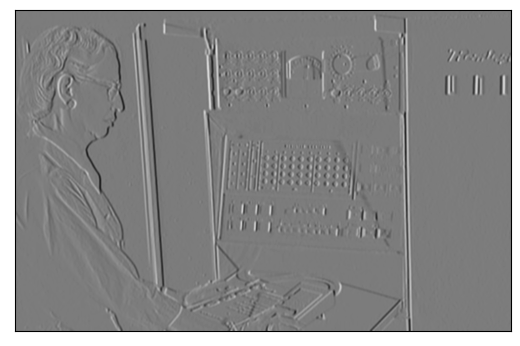

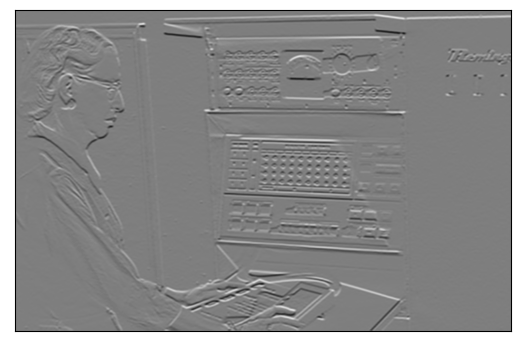

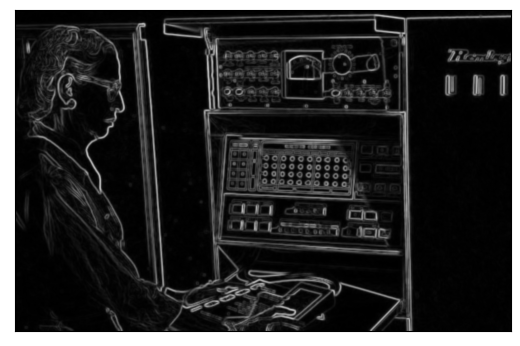

In [162]:
g_mag, edgeX, edgeY = edge_detection(img)
display_img(edgeX)
display_img(edgeY)
display_img(g_mag)

(4 pts) Use the original image and the Gaussian-filtered image as inputs respectively. <strong>Plot</strong> both outputs
in your report. <strong>Discuss</strong> the difference between the two images in no more than three sentences.

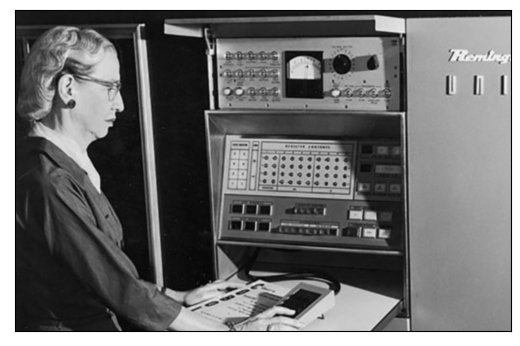

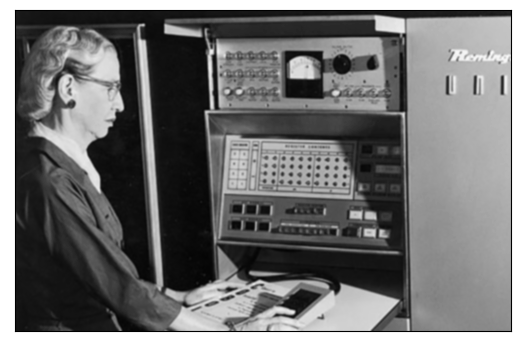

In [165]:
display_img(img)
display_img(filtered_gaussian)

Sobel Operator [18 pts]\
The Sobel operator is often used in image processing and computer vision.
Technically, it is a discrete differentiation operator, computing an approximation of the derivative of the
image intensity function.

(5 pts) Focus on the derivatives of the Gaussian-filtered image. Suppose we use this Gaussian kernel:
$$k_{Gaussian} = \begin{pmatrix} 1 & 2 & 1 \\2 & 4 & 2 \\1 & 2 & 1 \end{pmatrix}$$

Denote the input image as I. <strong>Prove</strong> that the derivatives of the Gaussian-filtered image (I ∗ kGaussian)
can be approximated by :

$$G_{x} = I ∗ \begin{pmatrix} 1 & 0 & −1 \\ 2 & 0 & −2 \\ 1 & 0 & −1 \end{pmatrix} \quad \quad \quad G_{y} = I ∗ \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & −1 \end{pmatrix}$$

These are the sobel operators.
<strong>Hint</strong>: To derive the derivatives of an image, you can use the conclusion in <strong>Gaussian Filter - Q3</strong>, i.e.
Gx can be calculated by (I ∗ kGaussian)x using the kx derived before.


(4 pts) Take the image ’grace hopper.png’ as the original image I. Complete the corresponding
part of function sobel operator() in filters.py with the kernels given previously. <strong>Plot</strong> the
Gx, Gy, and the gradient magnitude.

Now we want to explore what will happen if we use a linear combination of the two Sobel operators.
Here, the linear combination of the original kernels is called a steerable filter.

(a) (3 pt) We want to use 3x3 kernel to approximate $S(I, \alpha) = G_{x} cos\ \alpha + G_{y} sin\ \alpha$. <strong>Derive</strong> the
kernel in terms of α, i.e. the $K(\alpha)$ which makes $S(I, \alpha) = I ∗ K(\alpha)$.\
(b) (3 pts) Complete the function steerable filter() in filters.py. Take $\alpha = 0, \frac{\pi}{6}, \frac{\pi}{3}, \frac{\pi}{2}, \frac{2\pi}{3}, \frac{5\pi}{6}$. Plot the output images in your report.\
(c) (3 pts) Observe the plotting results. What do these kernels detect? Discuss how the outputs
change with α.


LoG Filter [8 pts] Laplacian is a differential operator: $\triangledown^{2}I(x, y) = \frac{\partial^{2} I(x,y)}{\partial x^{2}}  + \frac{\partial^{2} I(x,y)}{\partial y^{2}}$. And the Laplacian
of Gaussian (LoG) operation is very useful in computer vision.

(5 pts) In filters.py, you are given two LoG filters. You are not required to prove that they are
LoG, but you are encouraged to know what an LoG filter looks like. Complete the corresponding part
in filters.py. Plot the outputs of these two LoG filters in your report. Compare the two results.
Explain the reasons for the difference. Discuss whether these filters can detect edges. Can they detect
anything else?
Hint: We can take the high-value pixels in the outputs as the detected parts.

(3 pts) Instead of calculating LoG, we can often approximate it with a simple Difference of Gaussians
(DoG). Try to explain why this approximation works.
Hint: Try visualizing the following functions: two Gaussian functions with different variances, the
difference between the two functions, Laplacian of a Gaussian function

Feature Extraction [15 pts]\
While edges can be useful, corners are often more informative features as they are less common. In this
section, we implement a Harris Corner Detector (see: https://en.wikipedia.org/wiki/Harris Corner Detector)
to detect corners. Corners are defined as locations (x, y) in the image where a small change any direction
results in a large change in intensity if one considers a small window centered on (x, y) (or, intuitively,
one can imagine looking at the image through a tiny hole that’s centered at (x, y)). This can be contrasted
with edges where a large intensity change occurs in only one direction, or flat regions where moving in any
direction will result in small or no intensity changes. Hence, the Harris Corner Detector considers small
windows (or patches) where a small change in location leads large variation in multiple directions (hence
corner detector).
This question looks a bit long, but that is only because there is a fairly large amount of hand-holding
involved. The resulting solution, if done properly, is certainly under 10 lines.


Let’s consider a grayscale image where I(x, y) is the intensity value at image location (x, y). We can
calculate the corner score for every pixel (i, j) in the image by comparing a window W centered on (i, j)
with that same window centered at (i+u, j+v). Specifically, we will compute the sum of square differences
between the two:
$$
E(u,v) = \sum_{x,y\in W}[I(x + u, y+v) - I(x,y)]^{2}
$$
Your first task is to write a function that calculates this function for all pixels (i, j) with a fixed offset (u, v)
and window size W. In other words, if we calculate S = cornerscore(u, v), S is an image such that Sij is
the SSD between the window centered on (i, j) in I and the window centered on (i + u, j + v) in I. The
function will need to calculate this function to every location in the image. This is doable via a quadruple
for-loop (for every pixel (i, j), for every pixel (x, y) in the window centered at (i, j), compare the two). Use
same padding for offset-window values that lie outside of the image.

In [159]:
from os import read


def corner_score(image, u=5, v=5, window_size=(5,5)):
    # Given an input image, x_offset, y_offset, and window_size,
    # return the function E(u,v) for window size W
    # corner detector score for that pixel.
    # Input- image: H x W
    #        u: a scalar for x offset
    #        v: a scalar for y offset
    #        window_size: a tuple for window size
    #
    # Output- results: a image of size H x W
    # Use zero-padding to handle window values outside of the image. 

    h, w = image.shape

    padding = np.max(window_size) // 2
    # Make a copy and pad the edges
    padded = np.pad(image, padding * 2, 'edge')

    output = np.copy(image)
    #Traverse the image, ignoring the padded edges
    for y in range(padding, h + padding):
        for x in range(padding, w + padding):
            # Grab window
            window = padded[y - padding : y + padding + 1, x - padding : x + padding + 1]
            offset_window = padded[y - padding + u : y + padding + 1 + u, x - padding + v : x + padding + 1 + v ]
            f_metric = ((offset_window - window) ** 2).sum()
            if f_metric > 2500:
                output[y - padding, x - padding] = 255
    return output

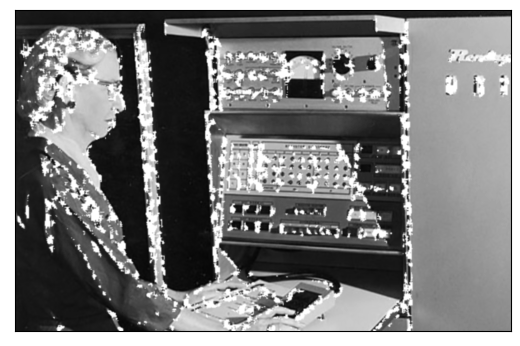

In [160]:
# define offsets and window size and calulcate corner score
u, v, W = 0, 2, (5,5)

score = corner_score(img, u, v, W)
display_img(score)